<a href="https://colab.research.google.com/github/pedropps1/teste/blob/main/C%C3%B3pia_de_PEDRO_PAULO_PEREIRA_SOUZA_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1:

Considere o seguinte jogo de dois jogadores:

> O jogo começa com um número inteiro N escolhido aleatoriamente. \
> A seguir, o jogo segue em turnos entre os jogadores P(+1) e P(-1). \
> Em cada turno, o jogador da rodada deve escolher entre duas ações: \
>  - decrementar N (N - 1)
>  - dividir N por 2 e arredondar para baixo (N//2)
>
> O jogador que terminar com 0 é o vencedor.

Exemplos de jogo:

> N sorteado: 1 \
> N = 1 \
> P(+1): N - 1 \
> N = 0 \
> P(-1) -> Vencedor \

=======================

> N sorteado: 10 \
> N = 10 \
> P(+1): N - 1 \
> N = 9 \
> P(-1): N//2 \
> N = 4 \
> P(+1): N - 1 \
> N = 3 \
> P(-1): N - 1 \
> N = 2 \
> P(+1): N//2 \
> N = 1 \
> P(-1): N - 1 \
> N = 0 \
> P(+1) -> Vencedor \

=======================

In [ ]:
from random import randint

class HalvingGame:
    def __init__(self, N_start=None, max_N=20):
        if not N_start: N_start = randint(1, max_N)
        self.N_start = N_start

    def startState(self):
        player = +1
        return (player, self.N_start)

    def isEnd(self, state):
        p, N = state
        return N == 0

    def utility(self, state):
        p, N = state
        assert N == 0
        return p*float('inf')

    def actions(self, state):
        return ['-', '/']

    def player(self, state):
        p, N = state
        return p

    def successor(self, state, action):
        p, N = state
        if action == '-':
            return (-p, N - 1)
        if action == '/':
            return (-p, N//2)

def humanPolicy(game, state):
    while True:
        action = input(f'P({state[0]}) [- or /]: ')
        if action in game.actions(state):
            return action

def run_game(policies, N_start=None, max_N=20):
    game = HalvingGame(N_start, max_N)
    state = game.startState()
    while not game.isEnd(state):
        print('='*10, state)
        player = game.player(state)
        policy = policies[player]
        action = policy(game, state)
        state = game.successor(state, action)

    print(f'utility = {game.utility(state)}')

Experimente o jogo com um amigo na célula abaixo.

In [ ]:
policies = {+1: humanPolicy, -1: humanPolicy}
run_game(policies, max_N=10) # experimente com diferentes valores de max_N ou para valores fixo de N_start

Implemente a política minimax para o jogo.

In [ ]:
def minimaxPolicy(game, state):
    # TODO
    return action

Colocando duas políticas minimax como adversárias e variando N_start entre 1 e 1000, quem ganha mais jogos, o jogador +1 ou o jogador -1? E quantos jogos cada jogador ganha?

# Exercício 2:

Execute as céculas abaixo para instalar e importar o pacote necessário para o exercício.

In [1]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.2 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

## Gymnasium

O [Gymnasium](https://gymnasium.farama.org/) visa fornecer um benchmark fácil de configurar com uma ampla variedade de ambientes diferentes. O objetivo é padronizar como os ambientes são definidos nas publicações de pesquisa de IA para que as pesquisas publicadas se tornem mais facilmente reprodutíveis. O projeto pretende fornecer ao usuário uma interface simples.


A peça central do Gym é o ambiente, que define o problema em que seu algoritmo de reforço atuará.

O ambiente possui alguns métodos básicos:

- **reset**: reinicia o ambiente ao seu estado inicial
- **step**: Dá um passo adiante na simulação do ambiente
  - retorna uma observação, a recomensa, um sinalizador de término do episódio, e informações adicionais (caso relevantes).
- **render**: renderiza o ambiente para visualização de seu estado atuado (Não utilizado neste notebook)
  - retorna apenas a observação inicial.

Abaixo temos um ambiente FrozenLake [https://gymnasium.farama.org/environments/toy_text/frozen_lake/#frozen-lake] que representa um MDP que será utilizado na atividade.

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

## Random Agent

Abaixo temos o código para um agente que age aleatoriamente interagindo com o ambiente criado anteriormente.

In [ ]:
class RandomAgent:
    def __init__(
        self,
        action_space
    ):
        self.action_space = action_space

    def get_action(
        self,
        state
    ):
        return self.action_space.sample()

    def update(
        self,
        state,
        action,
        reward,
        done,
        next_state,
    ):
        pass

## Fluxo de Interação

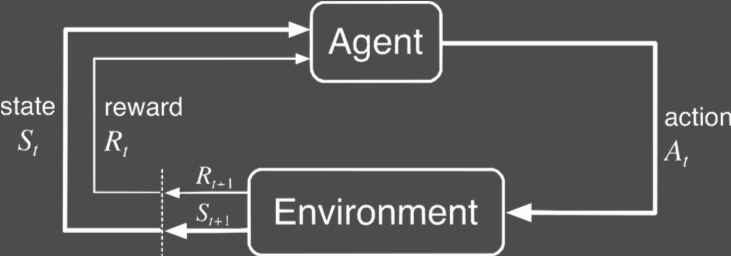

O fluxo de interação entre um agente e um ambiente durante alguns episódios é codificado da seguinte forma:

In [ ]:
from tqdm import tqdm

def run_interaction(env, agent, n_episodes):
    rewards = []
    for episode in tqdm(range(n_episodes)):
        state, info = env.reset()
        done = False

        total_reward = 0
        # play one episode
        while not done:
            action = agent.get_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)

            # update the agent
            done = terminated or truncated
            agent.update(state, action, reward, done, next_state)

            # update the current state
            state = next_state

            total_reward += reward

        rewards += [total_reward]
    return rewards

Como podemos ver abaixo, um agente aleatório não aprende nada sobre o ambiente e, por isso, sua recompensa média por episódio é relativamente constante mesmo após 10000 iterações.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
n_episodes = int(1e4)

rewards = run_interaction(env, RandomAgent(env.action_space), n_episodes)
mean_rewards = np.array(rewards).reshape(-1, 100).mean(axis=-1)
plt.plot(mean_rewards)

## Q-learning Agent

Abaixo temos o esqueleto de um agente que utiliza o algoritmo Q-learning para aprender a maximizar o retorno esperado no ambiente onde estiver interagindo.

In [ ]:
from collections import defaultdict

class QLearningAgent:
    def __init__(
        self,
        action_space,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float,
    ):
        """Inicializa um agente de RL com um dict vazio de q_values,
        uma taxa de aprendizado e um epsilon.

        Args:
            action_space: env.action_space do env a ser avaliado
            learning_rate: taxa de aprendizado
            initial_epsilon: valor inicial de epsilon
            epsilon_decay: fator de decaimento de epsilon
            final_epsilon: valor final de epsilon
            discount_factor: fator de disconto para calcular os q_values
        """
        self.action_space = action_space

        self.q_values = defaultdict(lambda: np.zeros(action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

    def get_action(self, state):
        ############
        ### TODO
        pass
        ############

    def update(
        self,
        state,
        action,
        reward,
        done,
        next_state,
    ):
        ############
        ### TODO
        ############

        if done:
            self.decay_epsilon()

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [ ]:
# hyperparameters
learning_rate = ?
start_epsilon = ?
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = ?
discount_factor = 0.9

agent = QLearningAgent(
    env.action_space,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount_factor
)

Implemente as funções *get_action* e *update*, e experimente valores diferentes para os hiperparâmetros acima afim de demonstrar o algoritmo Q-learning em funcionamento mostrando a curva de retorno médio x episódio para o fluxo de interação codificado anteriormente.

In [ ]:
rewards = run_interaction(env, agent, n_episodes)
mean_rewards = np.array(rewards).reshape(-1, 100).mean(axis=-1)
plt.plot(mean_rewards)

# Exercício 3:

## Sudoku

A seguir temos uma implementação para o famoso jogo Sudoku.

Nessa implementação, cada casa do tabuleiro é representada como uma combinação de uma letra (A, B, C, ..., I) e um número (1, 2, 3, ..., 9) conforme ilustrado na figura a seguir:

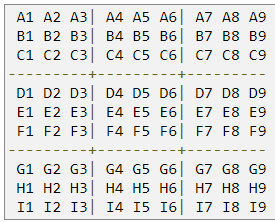

In [ ]:
rows = 'ABCDEFGHI'
cols = '123456789'

def cross(a, b):
    return [s+t for s in a for t in b]

boxes = cross(rows, cols)
print(f'[{boxes[0]}, {boxes[1]}, {boxes[2]}, ... , {boxes[-3]}, {boxes[-2]}, {boxes[-1]}]')

Para representar o tabuleiro, são utilizadas duas formas:

  - *grid_str*: representação em string para o estado inicial do tabuleiro, em que as casas estão dispostas em sequência ("[A1][A2]...[A9][B1][B2]...[B9]...[I9]") com as casas vazias sendo representadas com um ponto e as preenchidas com os seus próprios valores;
  - *grid_dict*: representação em dicionário em que as chaves são as casas e os valores são pontos para casas vazias ou dígitos de 1 a 9 para casas preenchidas.

A seguir, temos um tabuleiro e suas respectivas representações exemplificando o proposto acima:

In [ ]:
grid_str = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
grid_dict = dict(zip(boxes, grid_str))

In [ ]:
def display(grid_dict):
    """
    Display the values as a 2-D grid.
    Input: The sudoku in dictionary form
    Output: None
    """
    width = 1+max(len(grid_dict[s]) for s in boxes)
    line = '+'.join(['-'*(width*3 + 1)]*3)
    for r in rows:
        print('', ''.join(grid_dict[r+c].center(width)+('| ' if c in '36' else '')
                      for c in cols))
        if r in 'CF': print(line)

display(grid_dict)

Implemente a função *solution* que recebe como input um tabuleiro no formato *grid_str* e retorna a solução do jogo no formato *grid_dict*.

Teste a sua função com os exemplos a seguir:

  - Tabuleiro fácil:
```
In:  
  grid_str = '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
  solved_board = solution(grid_str)
  display(solved_board)
==============================================================================================
Out:
4 8 3 | 9 2 1 | 6 5 7
9 6 7 | 3 4 5 | 8 2 1
2 5 1 | 8 7 6 | 4 9 3
------+-------+------
5 4 8 | 1 3 2 | 9 7 6
7 2 9 | 5 6 4 | 1 3 8
1 3 6 | 7 9 8 | 2 4 5
------+-------+------
3 7 2 | 6 8 9 | 5 1 4
8 1 4 | 2 5 3 | 7 6 9
6 9 5 | 4 1 7 | 3 8 2
```
  - Tabuleiro difícil:
```
In:  
  grid_str = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
  solved_board = solution(grid_str)
  display(solved_board)
==============================================================================================
Out:
4 1 7 | 3 6 9 | 8 2 5
6 3 2 | 1 5 8 | 9 4 7
9 5 8 | 7 2 4 | 3 1 6
------+-------+------
8 2 5 | 4 3 7 | 1 6 9
7 9 1 | 5 8 6 | 4 3 2
3 4 6 | 9 1 2 | 7 5 8
------+-------+------
2 8 9 | 6 4 3 | 5 7 1
5 7 3 | 2 9 1 | 6 8 4
1 6 4 | 8 7 5 | 2 9 3
```

